In [1]:
import pymc3 as pm
import arviz as az
import pandas as pd
import numpy as np

In this notebook I am testing whether the trick described in the **9.4. Speeding up JAGS** would also work in the case of pymc3. This trick consists in replacing the Bernoulli distributions at the bottom of the hierarchical model by the corresponding Binomial ones. Using the Bernoulli distribution seems to cause a computation overhead in the case of JAGS. However, as we can see below, that is not the case for pymc3, in which the running time is equivalent (and the sampling in the Bernoulli version takes even shorter.)

In [2]:
data = pd.read_csv('../../util/z6n8z2n7.csv')

In [3]:
y = data.y.astype(int).values
subjects = data.s.unique().tolist()
s = data.s.apply(lambda x: subjects.index(x))
n_total = len(y)

In [4]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [5]:
theta = []
y_obs = []
kappa = 10
with pm.Model() as model:
        omega = pm.Beta('omega', alpha = 1, beta = 1)
        for i in range(len(subjects)):           
            theta.append(pm.Beta('theta_' + str(i + 1), 
                                 alpha = omega * (kappa - 2) + 1, 
                                 beta = (1 - omega) * (kappa - 2) + 1))
            y_obs.append(pm.Bernoulli('y_obs_' + str(i + 1), p = theta[i], observed = y[s == i]))
        trace = pm.sample(chains = 4, draws = 50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_2, theta_1, omega]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 85 seconds.


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13027ef40>,
      dtype=object)

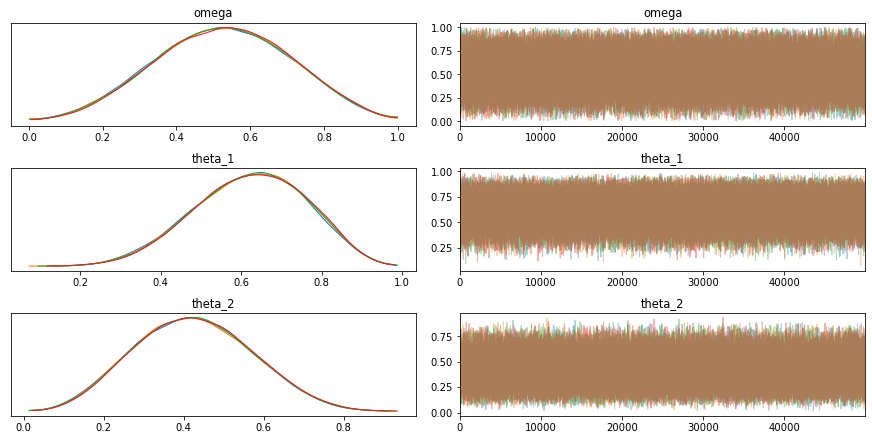

In [6]:
az.plot_trace(trace)

In [7]:
n = []
z = []
for i in range(len(subjects)):
    n.append(np.sum(s == i))
    z.append(np.sum(y[s == i] == 1))
    print('z_' + str(i) + ' = ' + str(z[-1]) + ', n_' + str(i) + ' = ' + str(n[-1]))

z_0 = 6, n_0 = 8
z_1 = 2, n_1 = 7


In [8]:
# Adaptar este para usar Z
theta = []
y_obs = []
kappa = 10
with pm.Model() as model:
        omega = pm.Beta('omega', alpha = 1, beta = 1)
        for i in range(len(subjects)):           
            theta.append(pm.Beta('theta_' + str(i + 1), 
                                 alpha = omega * (kappa - 2) + 1, 
                                 beta = (1 - omega) * (kappa - 2) + 1))
        
            y_obs.append(pm.Binomial('y_obs_' + str(i + 1), 
                                     p = theta[i], 
                                     n = n[i],
                                     observed = z[i]))
        trace = pm.sample(chains = 4, draws = 50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_2, theta_1, omega]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 91 seconds.


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134d4d9a0>,
      dtype=object)

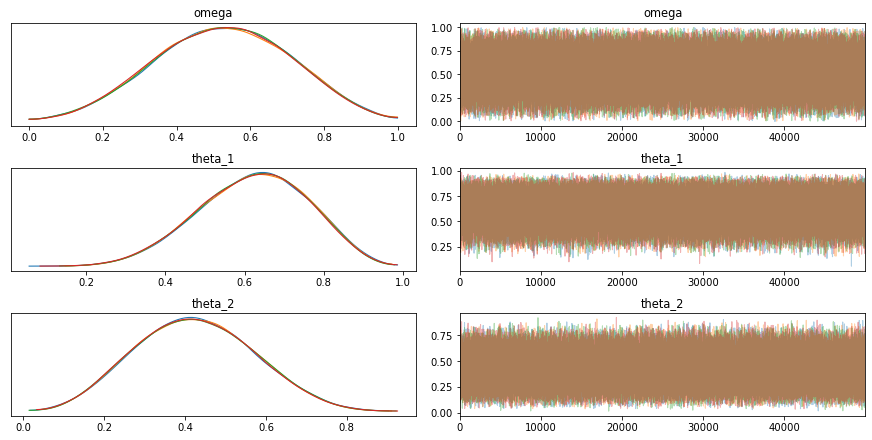

In [9]:
az.plot_trace(trace)